# UPI Fraud Detection in Healthcare Transactions

**Author:** Aprajita Dixit  
**Year:** 2025  
**Tools:** Excel, SQLite, Python (Pandas, Matplotlib), Power BI


## Step 1: Import Required Libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

## Step 2: Set Working Directory

In [2]:
os.getcwd()

'C:\\Users\\aishwarya\\Desktop\\UPI_Fraud_Healthcare_Data_Analysis\\Python'

In [3]:
os.listdir()

['.ipynb_checkpoints', 'upi_fraud_healthcare_analysis.ipynb']

In [4]:
os.listdir("../data")  # goes one level up

['upi_fraud_healthcare_cleaned.csv.csv']

## Step 3: Load Cleaned Dataset

In [5]:
df = pd.read_csv("../data/upi_fraud_healthcare_cleaned.csv.csv")
df.head()

,transaction_id,transaction_date,hospital_name,city,patient_age,gender,service_type,upi_app,amount,transaction_status,failure_reason,fraud_flag
0,TXN001,06-04-2025,Apollo,Delhi,34,F,OPD,GPay,500,Success,NaN,No
1,TXN002,28-03-2025,Fortis,Mumbai,45,M,IPD,PhonePe,15000,Failed,Network,No
2,TXN003,06-03-2025,AIIMS,Delhi,28,F,Pharmacy,Paytm,1200,Success,NaN,No
3,TXN004,14-04-2025,Apollo,Delhi,52,M,IPD,GPay,9800,Failed,Bank,Yes
4,TXN005,08-04-2025,Max,Noida,40,F,OPD,PhonePe,400,Success,NaN,No


## Step 4: Dataset Overview

In [6]:
df.shape
df.columns
df.dtypes

transaction_id        object
transaction_date      object
hospital_name         object
city                  object
patient_age            int64
gender                object
service_type          object
upi_app               object
amount                 int64
transaction_status    object
failure_reason        object
fraud_flag            object
dtype: object

## Step 5: Data Quality Check

In [7]:
df.isnull().sum()
df.describe()

,patient_age,amount
count,200.000000,200.000000
mean,46.580000,5361.630000
std,16.892614,7561.809785
min,19.000000,206.000000
25%,32.000000,1412.500000
50%,45.000000,2194.000000
75%,61.000000,2974.250000
max,75.000000,29985.000000


## Step 6: Basic Fraud Analysis

In [8]:
# Total transactions
total_transactions = len(df)

# Total fraud transactions
total_fraud = len(df[df["fraud_flag"] == "Yes"])

total_transactions, total_fraud

(200, 23)

## Step 7: Fraud by Hospital

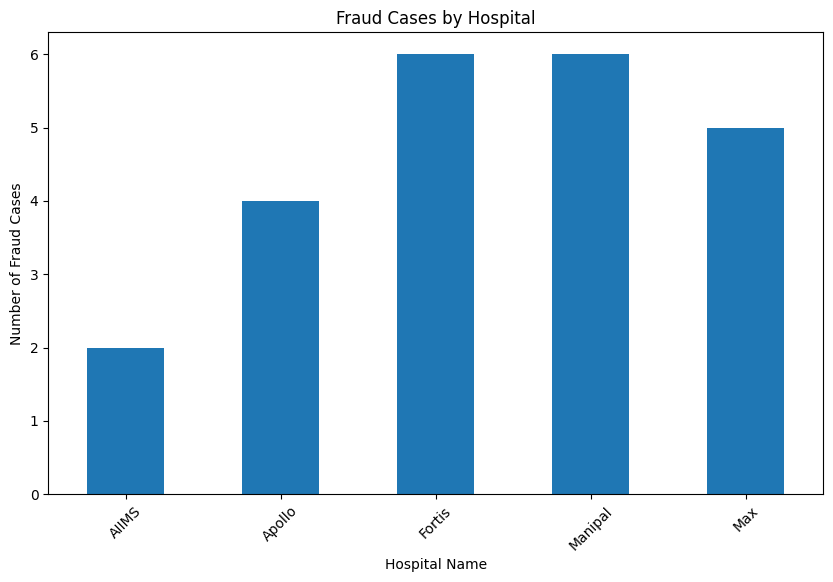

In [9]:
fraud_hospital = df[df["fraud_flag"] == "Yes"].groupby("hospital_name").size()

fraud_hospital.plot(kind="bar", figsize=(10,6))
plt.title("Fraud Cases by Hospital")
plt.xlabel("Hospital Name")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=45)
plt.show()

## Step 8: Fraud by UPI Application

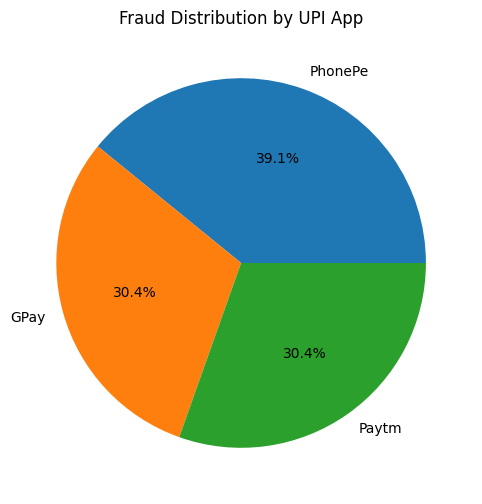

In [10]:
fraud_upi = df[df["fraud_flag"] == "Yes"]["upi_app"].value_counts()

fraud_upi.plot(kind="pie", autopct="%1.1f%%", figsize=(6,6))
plt.title("Fraud Distribution by UPI App")
plt.ylabel("")
plt.show()

## Step 9: Monthly Fraud Trend

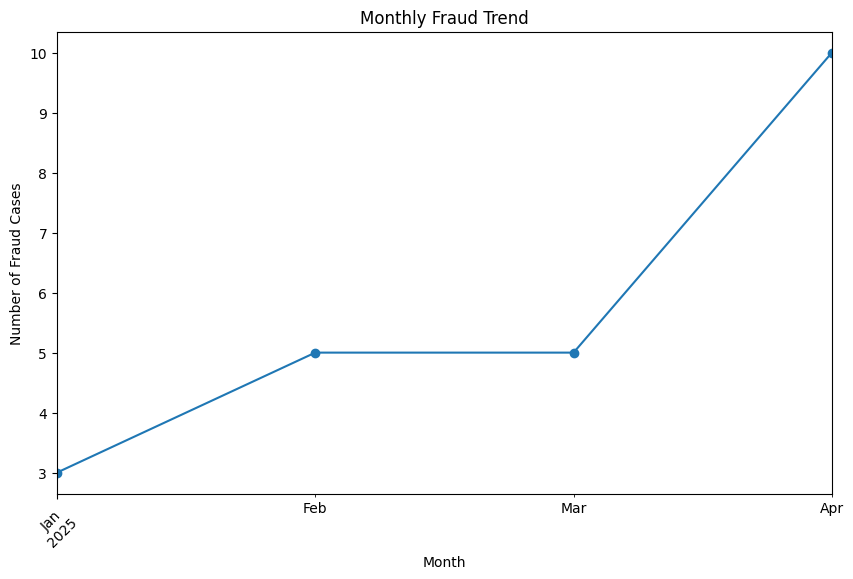

In [11]:
# Convert transaction_date to datetime with correct format
df["transaction_date"] = pd.to_datetime(df["transaction_date"], dayfirst=True)

# Group by month and count fraud transactions
monthly_fraud = (
    df[df["fraud_flag"] == "Yes"]
    .groupby(df["transaction_date"].dt.to_period("M"))
    .size()
)

# Plot
monthly_fraud.plot(kind="line", marker="o", figsize=(10,6))
plt.title("Monthly Fraud Trend")
plt.xlabel("Month")
plt.ylabel("Number of Fraud Cases")
plt.xticks(rotation=45)
plt.show()


## Step 10: High-Value Failed Transactions

In [12]:
high_value_failed = df[
    (df["transaction_status"] == "Failed") &
    (df["amount"] > 7000)
]

high_value_failed[
    ["transaction_id", "hospital_name", "upi_app", "amount", "transaction_status"]
]

,transaction_id,hospital_name,upi_app,amount,transaction_status
1,TXN002,Fortis,PhonePe,15000,Failed
3,TXN004,Apollo,GPay,9800,Failed
6,TXN007,AIIMS,GPay,22000,Failed
39,TXN040,Manipal,Paytm,25782,Failed
67,TXN068,Max,PhonePe,9182,Failed
73,TXN074,Max,Paytm,24898,Failed
105,TXN106,Max,PhonePe,19356,Failed
136,TXN137,AIIMS,PhonePe,8255,Failed
139,TXN140,Manipal,PhonePe,9835,Failed
140,TXN141,Fortis,GPay,26661,Failed


## Conclusion

This Python analysis helped identify fraud patterns across hospitals, UPI apps, and time periods. The visualizations highlight areas of high fraud risk and support data-driven decision-making in healthcare UPI payments.